<!-- impot libraries -->

In [1]:
import pandas as pd
import numpy as np
import time
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
MyDf = pd.read_csv("diabetes_prediction_dataset.csv")

In [3]:
MyDf

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [4]:
MyDf.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [5]:
Numeric_DF = MyDf.drop(columns=['gender','smoking_history'], axis = 1)

<!-- Correlation between numerical features -->

In [6]:
corr_df = Numeric_DF.corr()
corr_df

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.251171,0.233354,0.337396,0.101354,0.110672,0.258008
hypertension,0.251171,1.000000,0.121262,0.147666,0.080939,0.084429,0.197823
heart_disease,0.233354,0.121262,1.000000,0.061198,0.067589,0.070066,0.171727
bmi,0.337396,0.147666,0.061198,1.000000,0.082997,0.091261,0.214357
HbA1c_level,0.101354,0.080939,0.067589,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.110672,0.084429,0.070066,0.091261,0.166733,1.000000,0.419558
diabetes,0.258008,0.197823,0.171727,0.214357,0.400660,0.419558,1.000000


<Axes: >

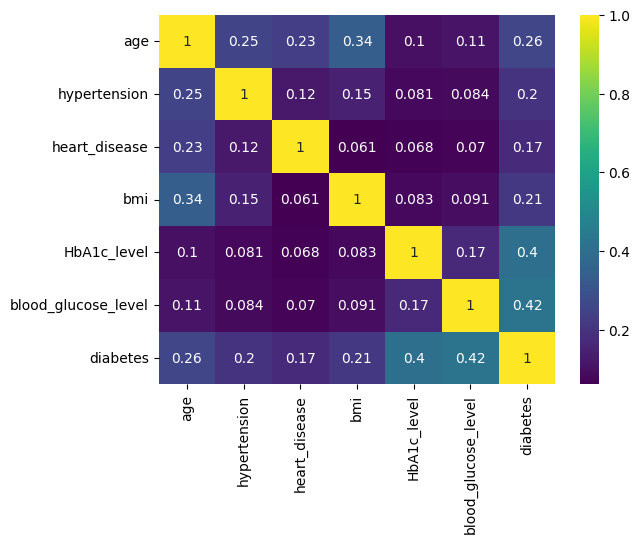

In [7]:
sns.heatmap(corr_df, annot = True, cmap = "viridis")

<!-- Feature engineering & Preprocessing -->

<!-- As it can be seen we do not have any null values in any coulmn -->

In [8]:
MyDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


<!-- Lable encoding the 'gender' column, since it's binary, we just give it 0/1 values  -->

In [9]:
MyDf['gender'] = LabelEncoder().fit_transform(MyDf['gender'])

In [10]:
MyDf['smoking_history'].value_counts() 

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

<!-- Since 'smoking_history' feature has multiple values, and it doesn't have a natural numeric order, one-hot coding would be the safest option -->

In [11]:
MyDf = pd.get_dummies(MyDf, columns=['smoking_history'], drop_first=True)


In [12]:
MyDf

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0,80.0,0,1,25.19,6.6,140,0,False,False,False,True,False
1,0,54.0,0,0,27.32,6.6,80,0,False,False,False,False,False
2,1,28.0,0,0,27.32,5.7,158,0,False,False,False,True,False
3,0,36.0,0,0,23.45,5.0,155,0,True,False,False,False,False
4,1,76.0,1,1,20.14,4.8,155,0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,27.32,6.2,90,0,False,False,False,False,False
99996,0,2.0,0,0,17.37,6.5,100,0,False,False,False,False,False
99997,1,66.0,0,0,27.83,5.7,155,0,False,False,True,False,False
99998,0,24.0,0,0,35.42,4.0,100,0,False,False,False,True,False


In [13]:
print(MyDf.columns.tolist())

['gender', 'age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes', 'smoking_history_current', 'smoking_history_ever', 'smoking_history_former', 'smoking_history_never', 'smoking_history_not current']


In [14]:
X = MyDf.drop('diabetes' , axis = 1)
y = MyDf['diabetes']

In [15]:
X['smoking_history_current'] = X['smoking_history_current'].map({True: 1, False: 0})
X['smoking_history_ever'] = X['smoking_history_ever'].map({True: 1, False: 0})
X['smoking_history_former'] = X['smoking_history_former'].map({True: 1, False: 0})
X['smoking_history_never'] = X['smoking_history_never'].map({True: 1, False: 0})
X['smoking_history_not current'] = X['smoking_history_not current'].map({True: 1, False: 0})

<!-- Function for Normalizing -->

In [16]:
def normalize_features(X):
   X = (X - X.mean()) / X.std()
   return X

In [17]:
X['bmi'] = normalize_features(X['bmi'])
X['HbA1c_level'] = normalize_features(X['HbA1c_level'])
X['blood_glucose_level'] = normalize_features(X['blood_glucose_level'])

In [18]:
X = X.drop(columns=['HbA1c_level','blood_glucose_level'])

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [20]:
model_xgboost = XGBClassifier(
    booster='dart',
    n_estimators = 80,
    learning_rate = 0.1,
    tree_method='approx',
    max_depth=15,
    reg_alpha=1,
    reg_lambda=1,
)

In [21]:
# Timer start
Start_time = time.time()

In [22]:
model_xgboost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster='dart', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=80, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [23]:
y_pred = model_xgboost.predict(X_test)
y_pred_proba = model_xgboost.predict_proba(X_test)[:, 1]

In [24]:
# Timer end
End_time = time.time()

Function for calculating time, accuracy and classification report 

In [25]:
def Time_Accuracy(y_test, y_pred, y_pred_proba, Start_time, End_time):
    accuracy = accuracy_score(y_test,y_pred)
    execution_time = (End_time - Start_time)
    execution_time = round(execution_time, 3)
    roc = roc_auc_score(y_test, y_pred_proba)
    roc = round(roc, 3)
    print(classification_report(y_test, y_pred))
    print("ROC-AUC:", roc)
    print(f'Accuracy : {accuracy * 100:.2f} % \n')
    print("Training & Predicting time :",execution_time, "seconds")

In [26]:
Time_Accuracy(y_test, y_pred, y_pred_proba, Start_time, End_time)

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     18292
           1       0.39      0.08      0.13      1708

    accuracy                           0.91     20000
   macro avg       0.65      0.53      0.54     20000
weighted avg       0.87      0.91      0.88     20000

ROC-AUC: 0.818
Accuracy : 91.08 % 

Training & Predicting time : 5.123 seconds


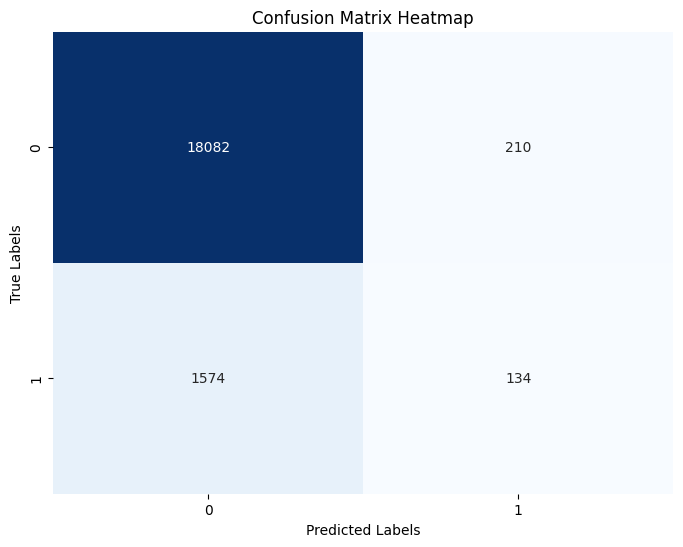

In [27]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False, 
            xticklabels = MyDf['diabetes'].unique(), yticklabels = MyDf['diabetes'].unique())

plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [28]:
importances = model_xgboost.get_booster().get_score(importance_type='gain')
df_importances = pd.DataFrame.from_dict(importances, orient='index', columns=['Importance'])
df_importances = df_importances.sort_values(by='Importance', ascending=False)

print(df_importances)


                             Importance
heart_disease                  4.171878
hypertension                   3.716078
age                            2.294263
bmi                            1.027164
smoking_history_current        0.723750
smoking_history_ever           0.691265
smoking_history_not current    0.674865
smoking_history_former         0.659689
gender                         0.577272
smoking_history_never          0.573772


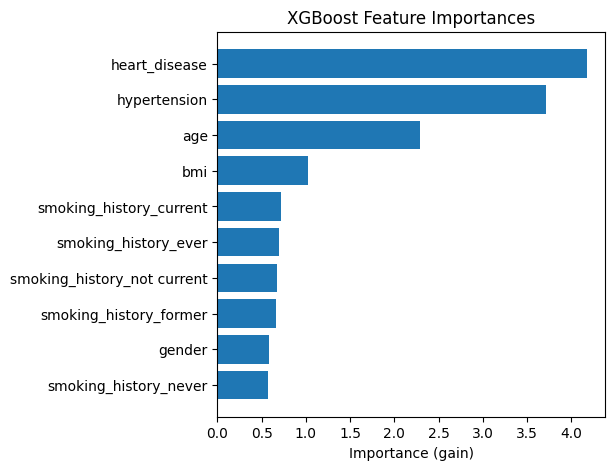

In [29]:
plt.figure(figsize=(5,5))
plt.barh(df_importances.index, df_importances['Importance'])
plt.gca().invert_yaxis()
plt.xlabel("Importance (gain)")
plt.title("XGBoost Feature Importances")
plt.show()


In [30]:
Start_time = time.time()

In [31]:
feature_importances = model_xgboost.feature_importances_
feature_importances = feature_importances/feature_importances.sum()

X_train_weighted = X_train * feature_importances
X_test_weighted = X_test * feature_importances

nn = MLPClassifier(hidden_layer_sizes=(32, 16), max_iter = 300, random_state=42)
nn.fit(X_train_weighted, y_train)

MLPClassifier(hidden_layer_sizes=(32, 16), max_iter=300, random_state=42)

In [32]:
y_nn_pred = nn.predict(X_test_weighted)
y_nn_pred_proba = nn.predict_proba(X_test_weighted)[:, 1]

In [33]:
End_time = time.time()

In [34]:
Time_Accuracy(y_test, y_nn_pred, y_nn_pred_proba, Start_time, End_time)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     18292
           1       0.62      0.04      0.07      1708

    accuracy                           0.92     20000
   macro avg       0.77      0.52      0.51     20000
weighted avg       0.89      0.92      0.88     20000

ROC-AUC: 0.838
Accuracy : 91.58 % 

Training & Predicting time : 4.905 seconds


<!-- Testing with the 2 most impactful features -->

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [36]:
Start_time = time.time()

In [37]:
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)
y_pred_RF = classifier.predict(X_test)
y_pred_proba_RF = classifier.predict_proba(X_test)[:, 1]

In [38]:
End_time = time.time()

In [39]:
Time_Accuracy(y_test, y_pred_RF, y_pred_proba_RF, Start_time, End_time)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     18292
           1       0.33      0.16      0.21      1708

    accuracy                           0.90     20000
   macro avg       0.63      0.56      0.58     20000
weighted avg       0.87      0.90      0.88     20000

ROC-AUC: 0.77
Accuracy : 90.03 % 

Training & Predicting time : 5.451 seconds


In [40]:
Start_time = time.time()

In [41]:
cat = CatBoostClassifier(
    iterations=300,
    learning_rate=0.05,
    depth=6,
    eval_metric='Logloss',
    verbose=0,
    random_state=42
)
cat.fit(X_train, y_train)
y_pred_cat = cat.predict(X_test)
y_pred_proba_cat = cat.predict_proba(X_test)[:, 1]

In [42]:
End_time = time.time()

In [43]:
Time_Accuracy(y_test, y_pred_cat, y_pred_proba_cat, Start_time, End_time)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     18292
           1       0.55      0.05      0.09      1708

    accuracy                           0.92     20000
   macro avg       0.73      0.52      0.52     20000
weighted avg       0.89      0.92      0.88     20000

ROC-AUC: 0.839
Accuracy : 91.53 % 

Training & Predicting time : 3.919 seconds


In [44]:
model_xgboost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster='dart', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=80, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [45]:
xgb_train_preds = model_xgboost.predict_proba(X_train)[:, 1].reshape(-1, 1)
xgb_test_preds = model_xgboost.predict_proba(X_test)[:, 1].reshape(-1, 1)

cat_train_preds = cat.predict_proba(X_train)[:, 1].reshape(-1, 1)
cat_test_preds = cat.predict_proba(X_test)[:, 1].reshape(-1, 1)

In [46]:
X_train_stacked = np.concatenate([X_train, xgb_train_preds, cat_train_preds], axis=1)
X_test_stacked = np.concatenate([X_test, xgb_test_preds, cat_test_preds], axis=1)

In [ ]:
Start_time = time.time()

In [ ]:
nn = MLPClassifier(hidden_layer_sizes=(64, 32),
                   activation='relu',
                   solver='adam',
                   max_iter=500,
                   random_state=42)

nn.fit(X_train_stacked, y_train)

MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)

In [ ]:
End_time = time.time()

In [ ]:
y_pred = nn.predict(X_test_stacked)
y_pred_proba = nn.predict_proba(X_test_stacked)[:, 1]

In [ ]:
Time_Accuracy(y_test, y_pred, y_pred_proba, Start_time, End_time)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     18292
           1       0.27      0.14      0.19      1708

    accuracy                           0.89     20000
   macro avg       0.60      0.55      0.57     20000
weighted avg       0.87      0.89      0.88     20000

ROC-AUC: 0.705
Accuracy : 89.46 % 

Training & Predicting time : 26.649 seconds


In [ ]:
X_important_features = X[['HbA1c_level','blood_glucose_level']]

KeyError: "None of [Index(['HbA1c_level', 'blood_glucose_level'], dtype='object')] are in the [columns]"

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_important_features, y, test_size = 0.2, random_state = 42)

: 

In [ ]:
# Timer start
Start_time = time.time()

: 

In [ ]:
model_xgboost.fit(X_train,y_train)

: 

In [ ]:
y_pred = model_xgboost.predict(X_test)
y_pred_proba = model_xgboost.predict_proba(X_test)[:, 1]

: 

In [ ]:
# Timer end
End_time = time.time()

: 

In [ ]:
Time_Accuracy(y_test, y_pred, y_pred_proba, Start_time, End_time)

: 

In [ ]:
importances = model_xgboost.get_booster().get_score(importance_type='gain')
df_importances = pd.DataFrame.from_dict(importances, orient='index', columns=['Importance'])
df_importances = df_importances.sort_values(by='Importance', ascending=False)

print(df_importances)


: 

In [ ]:
Start_time = time.time()

: 

In [ ]:
feature_importances = model_xgboost.feature_importances_
feature_importances = feature_importances/feature_importances.sum()

X_train_weighted = X_train * feature_importances
X_test_weighted = X_test * feature_importances

nn = MLPClassifier(hidden_layer_sizes=(32, 16), max_iter = 300, random_state=42)
nn.fit(X_train_weighted, y_train)

: 

In [ ]:
y_nn_pred = nn.predict(X_test_weighted)
y_nn_pred_proba = nn.predict_proba(X_test_weighted)[:, 1]

: 

In [ ]:
End_time = time.time()

: 

In [ ]:
Time_Accuracy(y_test, y_nn_pred, y_nn_pred_proba, Start_time, End_time)

: 

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False, 
            xticklabels = MyDf['diabetes'].unique(), yticklabels = MyDf['diabetes'].unique())

plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

: 

In [ ]:
plt.figure(figsize=(5,5))
plt.barh(df_importances.index, df_importances['Importance'])
plt.gca().invert_yaxis()
plt.xlabel("Importance (gain)")
plt.title("XGBoost Feature Importances")
plt.show()


: 